In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv('hotel_bookings.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'agent', 'company', 'customer_type',
                    'reservation_status']

In [13]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
numerical_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
                  'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                  'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                  'booking_changes', 'days_in_waiting_list', 'adr',
                  'required_car_parking_spaces', 'total_of_special_requests']

In [17]:
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())


In [19]:
df = pd.get_dummies(df, drop_first=True)

In [20]:
x_mean = df["lead_time"].mean()
y_mean = df["adr"].mean()

print("\nMean of Lead Time:", x_mean)
print("Mean of ADR (Average Daily Rate):", y_mean)



Mean of Lead Time: 104.01141636652986
Mean of ADR (Average Daily Rate): 101.83112153446686


In [23]:
numerator = ((df["lead_time"] - x_mean) * (df["adr"] - y_mean)).sum()
denominator = ((df["lead_time"] - x_mean) ** 2).sum()
B1 = numerator / denominator
print("\nCalculated Slope (B1):", B1)



Calculated Slope (B1): -0.02982918031311619


In [25]:
B0 = y_mean - (B1 * x_mean)
print("Calculated Intercept (B0):", B0)


Calculated Intercept (B0): 104.93369682788668


In [27]:
df["Predicted_ADR"] = B0 + B1 * df["lead_time"]

In [29]:
print(df[['lead_time', 'adr', 'Predicted_ADR']].head())

   lead_time   adr  Predicted_ADR
0        342   0.0      94.732117
1        737   0.0      82.949591
2          7  75.0     104.724893
3         13  75.0     104.545917
4         14  98.0     104.516088


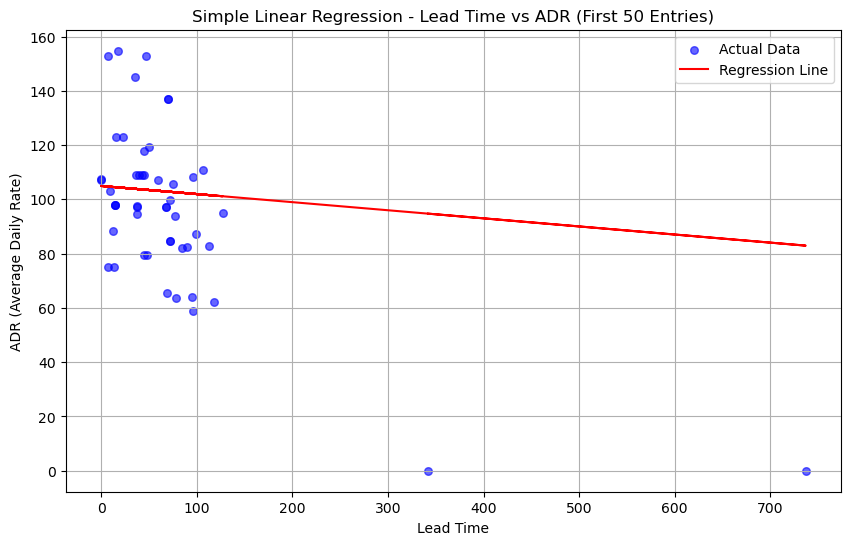

In [35]:
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.scatter(df["lead_time"][:50], df["adr"][:50], color='blue', alpha=0.6, s=30, label="Actual Data")
plt.plot(df["lead_time"][:50], df["Predicted_ADR"][:50], color='red', label="Regression Line")
plt.xlabel("Lead Time")
plt.ylabel("ADR (Average Daily Rate)")
plt.title("Simple Linear Regression - Lead Time vs ADR (First 50 Entries)")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Calculate RMSE for the hotel booking dataset
rmse = np.sqrt(((df["adr"] - df["Predicted_ADR"]) ** 2).mean())

# Print the RMSE value
print("\nRoot Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 50.43494576336323


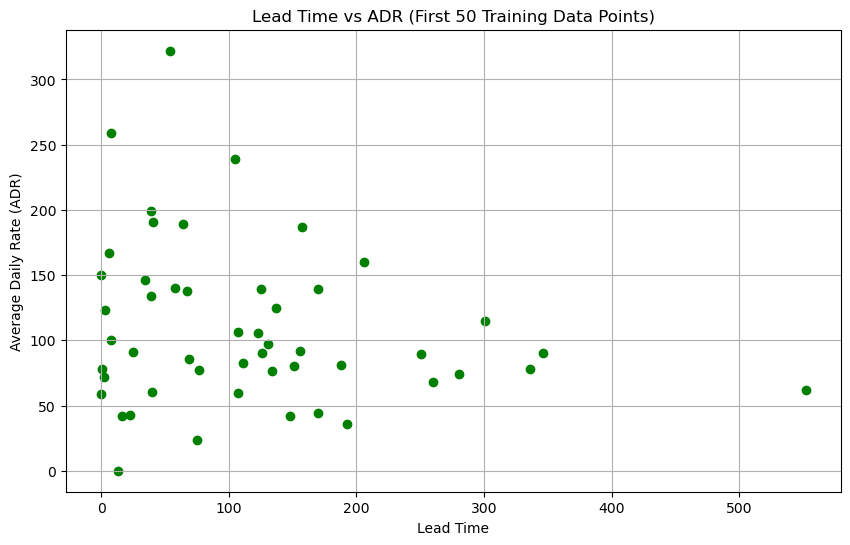

In [39]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select features and target
X = df[['lead_time']]  # Feature (Lead Time)
y = df['adr']          # Target (ADR)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot only the first 50 training samples
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:50], y_train[:50], color='green')
plt.title('Lead Time vs ADR (First 50 Training Data Points)')
plt.xlabel('Lead Time')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.show()
